In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression

In [179]:
avacado=pd.read_csv('avacado.csv')
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [180]:
avacado.info

<bound method DataFrame.info of       Unnamed: 0        Date  AveragePrice  Total Volume      4046       4225  \
0              0  27-12-2015          1.33      64236.62   1036.74   54454.85   
1              1  20-12-2015          1.35      54876.98    674.28   44638.81   
2              2  13-12-2015          0.93     118220.22    794.70  109149.67   
3              3  06-12-2015          1.08      78992.15   1132.00   71976.41   
4              4  29-11-2015          1.28      51039.60    941.48   43838.39   
...          ...         ...           ...           ...       ...        ...   
1512          10  16-10-2016          1.39     190846.01  57529.11   56366.66   
1513          11  09-10-2016          1.51     178235.75  43325.87   52189.61   
1514          12  02-10-2016          1.48     178410.82  46364.75   52893.38   
1515          13  25-09-2016          1.47     189131.52  54110.79   53593.58   
1516          14  18-09-2016          1.43     182978.30  43116.41   54193.42

In [181]:
avacado.shape

(1517, 14)

In [182]:
avacado.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1517.0,2.699539e+01,1.484829e+01,0.00,14.00,29.00,39.00,51.00
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79


In [140]:
avacado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

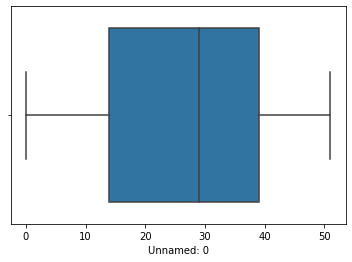

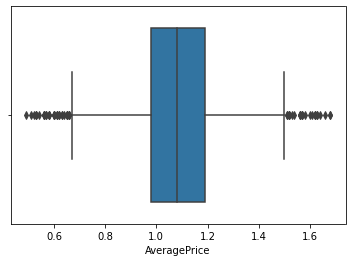

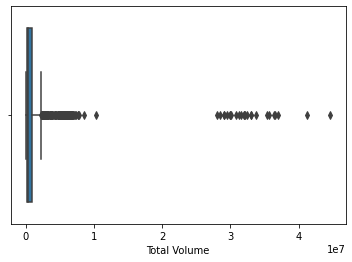

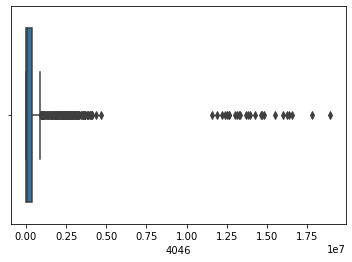

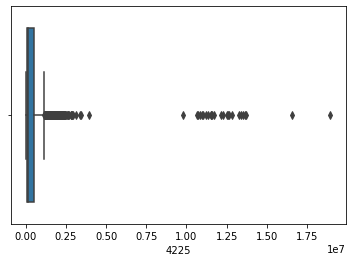

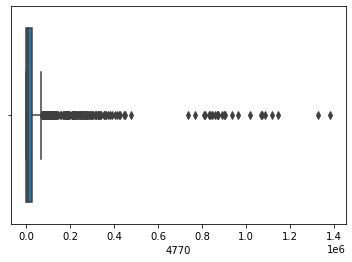

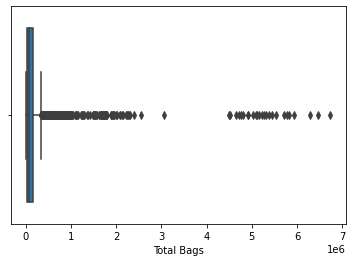

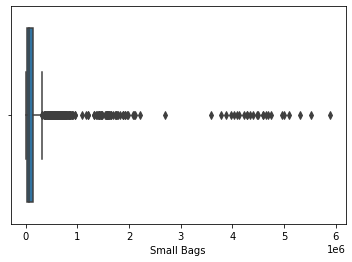

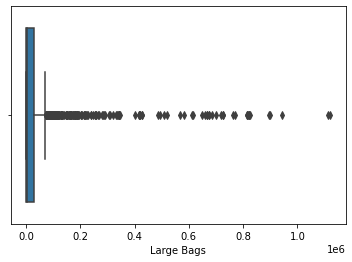

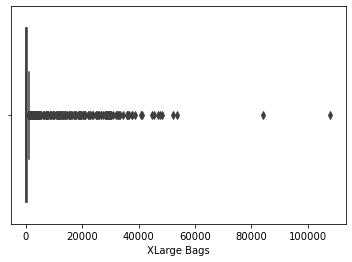

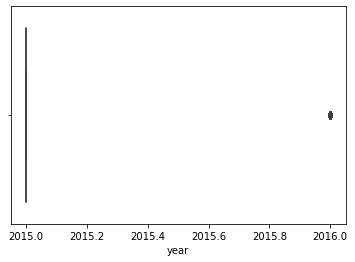

In [187]:
for i in avacado.describe().columns:
    sns.boxplot(avacado[i].dropna())
    plt.show()

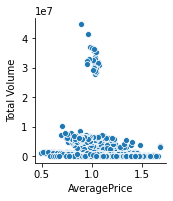

In [141]:
sns.pairplot(avacado,x_vars='AveragePrice',y_vars='Total Volume')

In [142]:
avacado['AveragePrice'].mean()

1.0749901120632825

In [143]:
avacado['AveragePrice'].min()

0.49

In [144]:
avacado['AveragePrice'].max()

1.68

In [145]:
avacado['Total Volume'].min()

38750.74

In [146]:
avacado['Total Volume'].max()

44655461.51

In [147]:
avacado['Total Volume'].mean()

1601879.06783784

In [148]:
avacado['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [149]:
avacado[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.967689
Total Bags,0.967689,1.000000


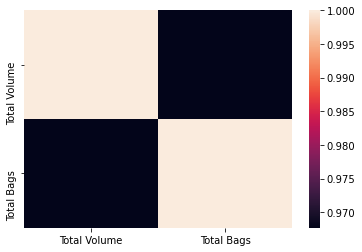

In [150]:
sns.heatmap(avacado[['Total Volume','Total Bags']].corr())

In [151]:
avacado.groupby('year')['Total Volume'].mean()

year
2015    1.610065e+06
2016    1.559787e+06
Name: Total Volume, dtype: float64

In [152]:
avacado.groupby('region')['AveragePrice'].mean()

region
Albany                 1.238657
Atlanta                1.012037
BaltimoreWashington    1.160923
Boise                  0.974923
Boston                 1.205484
BuffaloRochester       1.301569
California             1.055921
Charlotte              1.311613
Chicago                1.214783
Columbus               1.012553
DallasFtWorth          0.755882
Denver                 1.080833
Detroit                1.041250
GrandRapids            1.136957
GreatLakes             1.107222
HarrisburgScranton     1.157368
HartfordSpringfield    1.209231
Houston                0.780690
Indianapolis           1.126250
Jacksonville           1.113659
LasVegas               1.041000
LosAngeles             0.863333
Louisville             1.042941
MiamiFtLauderdale      1.176471
Midsouth               1.081111
Nashville              1.028400
NewYork                1.248636
Northeast              1.236667
NorthernNewEngland     1.111034
Orlando                1.133333
Philadelphia           1.293846
P

In [153]:
avacado['AveragePrice'].mean()

1.0749901120632825

In [154]:
avacado[avacado['AveragePrice'] > avacado['AveragePrice'].mean()][['AveragePrice','4046','4225','4770']].sort_values(by = ['AveragePrice'])

,AveragePrice,4046,4225,4770
702,1.08,2770.62,230517.24,140.77
1392,1.08,3871.79,438210.92,43926.90
632,1.08,86390.93,6821.52,11458.43
633,1.08,104187.91,7723.68,10813.59
640,1.08,97216.47,8423.57,12187.72
...,...,...,...,...
1413,1.63,1426.31,52281.34,27.83
1508,1.64,49399.39,26597.39,22714.68
1411,1.66,960.31,54243.42,22.85
1458,1.68,1126017.42,1186843.99,92064.47


In [155]:
conventional = avacado[avacado['type'] == 'conventional']
conventional

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [156]:
conventional.groupby('year')['AveragePrice'].mean()

year
2015    1.060110
2016    1.151498
Name: AveragePrice, dtype: float64

In [157]:
conventional.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

region
Syracuse               1.347368
Charlotte              1.311613
BuffaloRochester       1.301569
Philadelphia           1.293846
StLouis                1.260000
NewYork                1.248636
Albany                 1.238657
Northeast              1.236667
Chicago                1.214783
HartfordSpringfield    1.209231
Boston                 1.205484
Pittsburgh             1.178636
MiamiFtLauderdale      1.176471
RaleighGreensboro      1.166250
BaltimoreWashington    1.160923
HarrisburgScranton     1.157368
SanFrancisco           1.150667
GrandRapids            1.136957
Orlando                1.133333
Indianapolis           1.126250
Jacksonville           1.113659
NorthernNewEngland     1.111034
GreatLakes             1.107222
Roanoke                1.096471
Spokane                1.096122
Southeast              1.091111
Midsouth               1.081111
Denver                 1.080833
SouthCarolina          1.071250
Tampa                  1.068824
California             1.055921
S

In [158]:
avacado.groupby('region')['Total Volume'].mean().sort_values()

region
Syracuse               4.857841e+04
Albany                 7.629020e+04
Spokane                7.718453e+04
Louisville             7.764284e+04
Boise                  8.104617e+04
Pittsburgh             8.143082e+04
Roanoke                1.308864e+05
BuffaloRochester       1.321844e+05
Jacksonville           1.380222e+05
Columbus               1.457604e+05
Indianapolis           1.575043e+05
Nashville              1.674714e+05
Charlotte              1.762781e+05
GrandRapids            1.908866e+05
StLouis                1.944995e+05
RichmondNorfolk        1.967580e+05
HarrisburgScranton     2.183198e+05
RaleighGreensboro      2.405372e+05
HartfordSpringfield    2.685772e+05
LasVegas               2.790102e+05
Orlando                3.013391e+05
Tampa                  3.279430e+05
SouthCarolina          3.337852e+05
Detroit                3.390654e+05
Philadelphia           3.849221e+05
NorthernNewEngland     3.959559e+05
Atlanta                4.676372e+05
MiamiFtLauderdale    

In [159]:
avacado.groupby('year')['type'].value_counts()

year  type        
2015  conventional    1270
2016  conventional     247
Name: type, dtype: int64

In [160]:
avacado.groupby('year')['Total Volume'].count()

year
2015    1270
2016     247
Name: Total Volume, dtype: int64

In [161]:
avacado[['4046','Small Bags','Total Volume','Total Bags']].corr()

,4046,Small Bags,Total Volume,Total Bags
4046,1.000000,0.922278,0.985568,0.930395
Small Bags,0.922278,1.000000,0.960642,0.997341
Total Volume,0.985568,0.960642,1.000000,0.967689
Total Bags,0.930395,0.997341,0.967689,1.000000


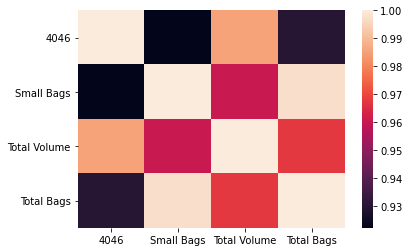

In [162]:
sns.heatmap(avacado[['4046','Small Bags','Total Volume','Total Bags']].corr())

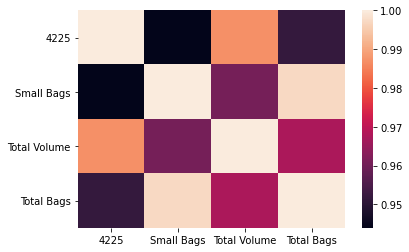

In [163]:
sns.heatmap(avacado[['4225','Small Bags','Total Volume','Total Bags']].corr())

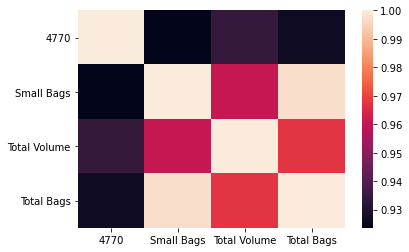

In [164]:
sns.heatmap(avacado[['4770','Small Bags','Total Volume','Total Bags']].corr())

In [165]:
avacado['Month'] = avacado['Date'].apply(lambda date:pd.Period(date, freq='M'))

In [166]:
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-06
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11


In [167]:
avg_monthly_sales = avacado.groupby(avacado['Month'])['Total Volume'].mean()
avg_monthly_sales

Month
2015-01    1.984611e+06
2015-02    1.530926e+06
2015-03    1.867653e+06
2015-04    1.857106e+06
2015-05    2.025253e+06
2015-06    1.804561e+06
2015-07    1.756250e+06
2015-08    1.378348e+06
2015-09    1.070826e+06
2015-10    1.532913e+06
2015-11    1.096834e+06
2015-12    1.163282e+06
2016-01    1.580008e+06
2016-02    1.473113e+06
2016-03    1.598049e+06
2016-04    1.489546e+06
2016-05    1.868668e+06
2016-06    1.594725e+06
2016-07    2.217648e+06
2016-08    1.918387e+06
2016-09    1.500425e+06
2016-10    1.420263e+06
2016-11    1.044938e+06
2016-12    1.268990e+06
Freq: M, Name: Total Volume, dtype: float64

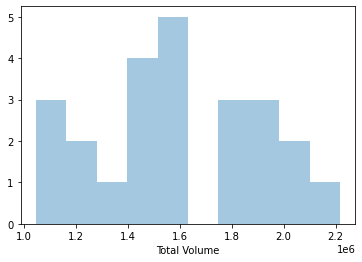

In [168]:
sns.distplot(avg_monthly_sales,bins=10, kde=False)

In [169]:
avacado['Quater'] = avacado['Date'].apply(lambda date:pd.Period(date, freq='Q'))

In [170]:
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Quater
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12,2015Q4
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12,2015Q4
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12,2015Q4
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-06,2015Q2
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11,2015Q4


In [171]:
avg_Q_sales = avacado.groupby(avacado['Quater'])['Total Volume'].mean()

In [172]:
avg_Q_sales

Quater
2015Q1    1.829428e+06
2015Q2    1.906081e+06
2015Q3    1.384532e+06
2015Q4    1.229398e+06
2016Q1    1.556661e+06
2016Q2    1.643336e+06
2016Q3    1.926284e+06
2016Q4    1.241163e+06
Freq: Q-DEC, Name: Total Volume, dtype: float64

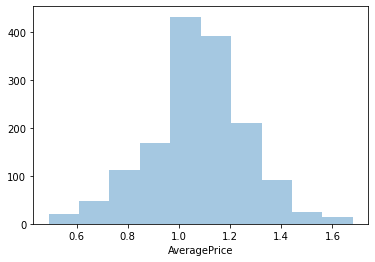

In [173]:
sns.distplot(avacado['AveragePrice'],bins=10, kde=False)

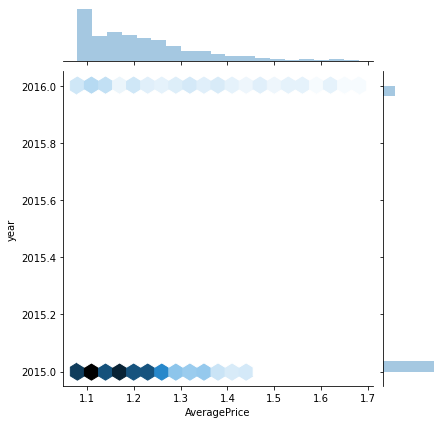

In [174]:
sns.jointplot(x='AveragePrice', y='year', data=avacado[avacado['AveragePrice'] > avacado['AveragePrice'].mean()], kind='hex', 
              gridsize=20)

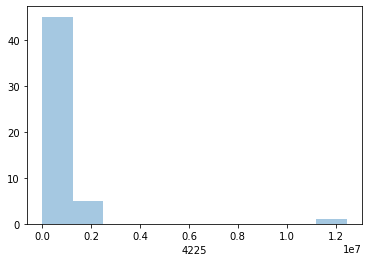

In [175]:
sns.distplot(avacado.groupby('region')['4225'].mean(),bins=10, kde=False)

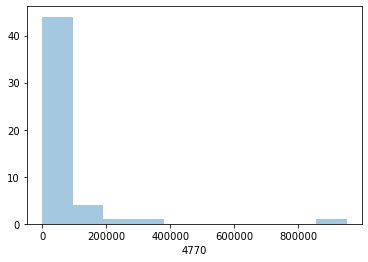

In [176]:
avacado.groupby('region')['4770'].mean()
sns.distplot(avacado.groupby('region')['4770'].mean(),bins=10, kde=False)

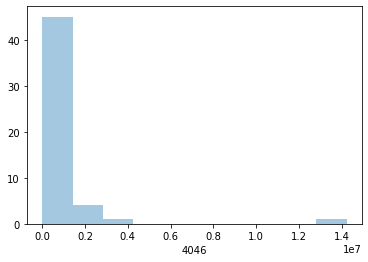

In [177]:
sns.distplot(avacado.groupby('region')['4046'].mean(),bins=10, kde=False)

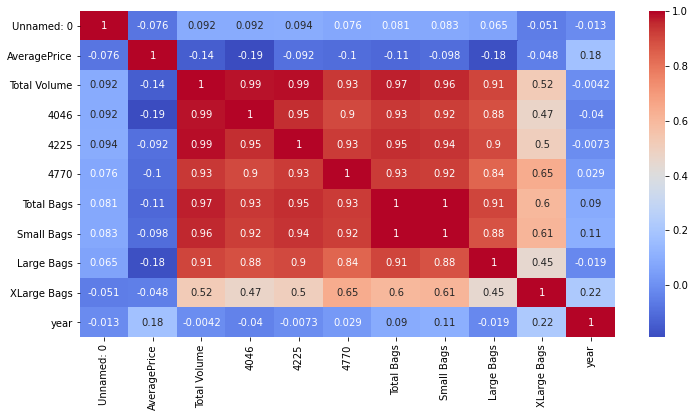

In [189]:
plt.figure(figsize=(12,6))
sns.heatmap(avacado.corr(),cmap='coolwarm',annot=True)

In [191]:
avacado['region'].nunique()

51

In [192]:
avacado['type'].nunique()

1

In [193]:
avacado_final=pd.get_dummies(avacado.drop(['region','Date'],axis=1),drop_first=True)


In [194]:
avacado_final.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [195]:
avacado_final.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016
1516,14,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,2016


In [196]:
X=avacado_final.iloc[:,1:14]
y=avacado_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [197]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [198]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.0480004485268276e-15
MSE: 3.202120053557281e-29
RMSE: 5.658727819534423e-15


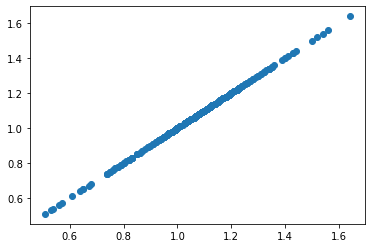

In [199]:
plt.scatter(x=y_test,y=pred)

In [200]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

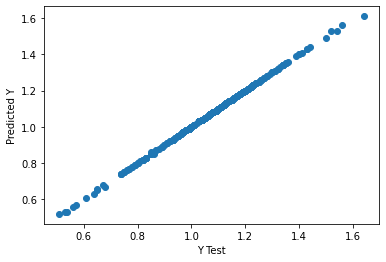

In [201]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [202]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0004605263157896527
MSE: 6.578947368421022e-06
RMSE: 0.002564945880212879
